## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\irvin\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
model.summary()

#optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 31s 620us/step - loss: 2.0489 - acc: 0.2676 - val_loss: 1.9443 - val_acc: 0.3090
Epoch 2/100
50000/50000 [==============================] - 26s 517us/step - loss: 1.8726 - acc: 0.3370 - val_loss: 1.8718 - val_acc: 0.3297
Epoch 3/100
50000/50000 [==============================] - 26s 518us/step - loss: 1.8035 - acc: 0.3614 - val_loss: 1.7927 - val_acc: 0.3673
Epoch 4/100
50000/50000 [==============================] - 27s 539us/step - loss: 1.7589 - acc: 0.3796 - val_loss: 1.7375 - val_acc: 0.3902
Epoch 5/100
50000/50000 [==============================] - 26s 527us/step - loss: 1.7229 - acc: 0.3915 - val_loss: 1.7649 - val_acc: 0.3751
Epoch 6/100
50000/50000 [==============================] - 28s 552us/step - loss: 1.6935 - acc: 0.4021 - val_loss: 1.7468 - val_acc: 0.3631
Epoch 7/100
50000/50000 [==============================] - 27s 549us/step - loss: 1.6682 - acc: 0.4114 - val_l

Epoch 59/100
50000/50000 [==============================] - 29s 572us/step - loss: 1.1751 - acc: 0.5888 - val_loss: 1.5298 - val_acc: 0.4686
Epoch 60/100
50000/50000 [==============================] - 28s 554us/step - loss: 1.1666 - acc: 0.5902 - val_loss: 1.3969 - val_acc: 0.5072
Epoch 61/100
50000/50000 [==============================] - 28s 561us/step - loss: 1.1596 - acc: 0.5929 - val_loss: 1.4038 - val_acc: 0.5009
Epoch 62/100
50000/50000 [==============================] - 29s 582us/step - loss: 1.1539 - acc: 0.5936 - val_loss: 1.4321 - val_acc: 0.4969
Epoch 63/100
50000/50000 [==============================] - 28s 566us/step - loss: 1.1522 - acc: 0.5967 - val_loss: 1.4219 - val_acc: 0.4975
Epoch 64/100
50000/50000 [==============================] - 28s 558us/step - loss: 1.1449 - acc: 0.5981 - val_loss: 1.4152 - val_acc: 0.4981
Epoch 65/100
50000/50000 [==============================] - 26s 527us/step - loss: 1.1411 - acc: 0.5974 - val_loss: 1.4581 - val_acc: 0.4963
Epoch 66/100


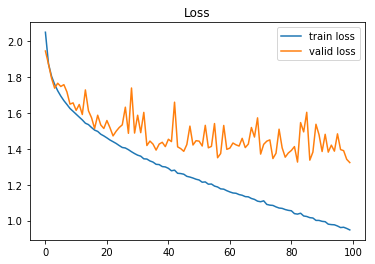

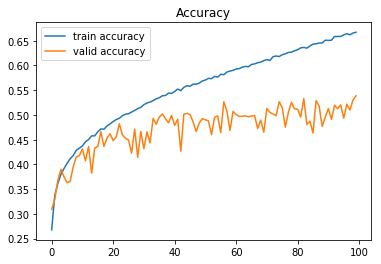

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()